In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("../data/train.csv", index_col = "Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

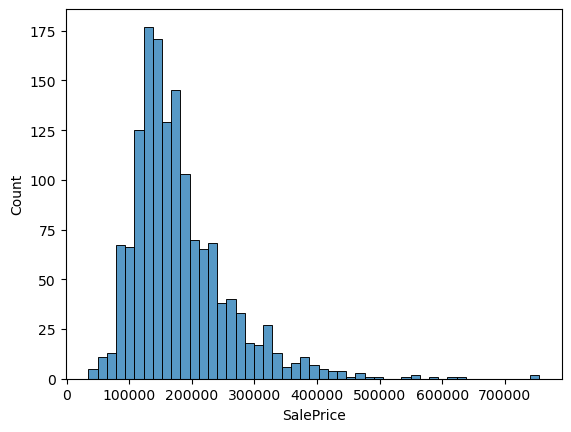

In [5]:
sns.histplot(
    df["SalePrice"]
);

In [7]:
null_df = df.isnull().sum()
(null_df[null_df > 0]/df.shape[0]).round(3).sort_values(ascending = False)

PoolQC          0.995
MiscFeature     0.963
Alley           0.938
Fence           0.808
MasVnrType      0.597
FireplaceQu     0.473
LotFrontage     0.177
GarageType      0.055
GarageYrBlt     0.055
GarageFinish    0.055
GarageQual      0.055
GarageCond      0.055
BsmtFinType2    0.026
BsmtExposure    0.026
BsmtFinType1    0.025
BsmtCond        0.025
BsmtQual        0.025
MasVnrArea      0.005
Electrical      0.001
dtype: float64

### Data Cleaning :

In [9]:
cat_cols = df.select_dtypes(exclude = "number").columns
num_cols = df.select_dtypes(include = "number").columns

In [8]:
#remove features with > 0.7 null values

def rem_null(df, threshold = 0.7):
    null_df = df.isnull().mean()
    to_rem = null_df[null_df > threshold].index.tolist()
    print(f"Dropping features : {to_rem}")
    df.drop(to_rem, axis = 1, inplace = True)
    
    return df

df = rem_null(df)

Dropping features : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [29]:
# rem categorical features with single category having > 0.95 share --- very low information

def rem_highcat(df, threshold = 0.95):
    to_rem = []
    for col in cat_cols :
        if df[col].value_counts(normalize = True).iloc[0] >= threshold:
            to_rem.append(col)
            cat_cols.
    print(f"Dropping features : {to_rem}")
    df = df.drop(to_rem, axis = 1)

    return df

df = rem_highcat(df)

Dropping features : ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond']


In [42]:
df.shape

(1460, 69)

In [46]:
# updating these since some features have been removed

cat_cols = df.select_dtypes(exclude = "number").columns
num_cols = df.select_dtypes(include = "number").columns

In [ ]:
#

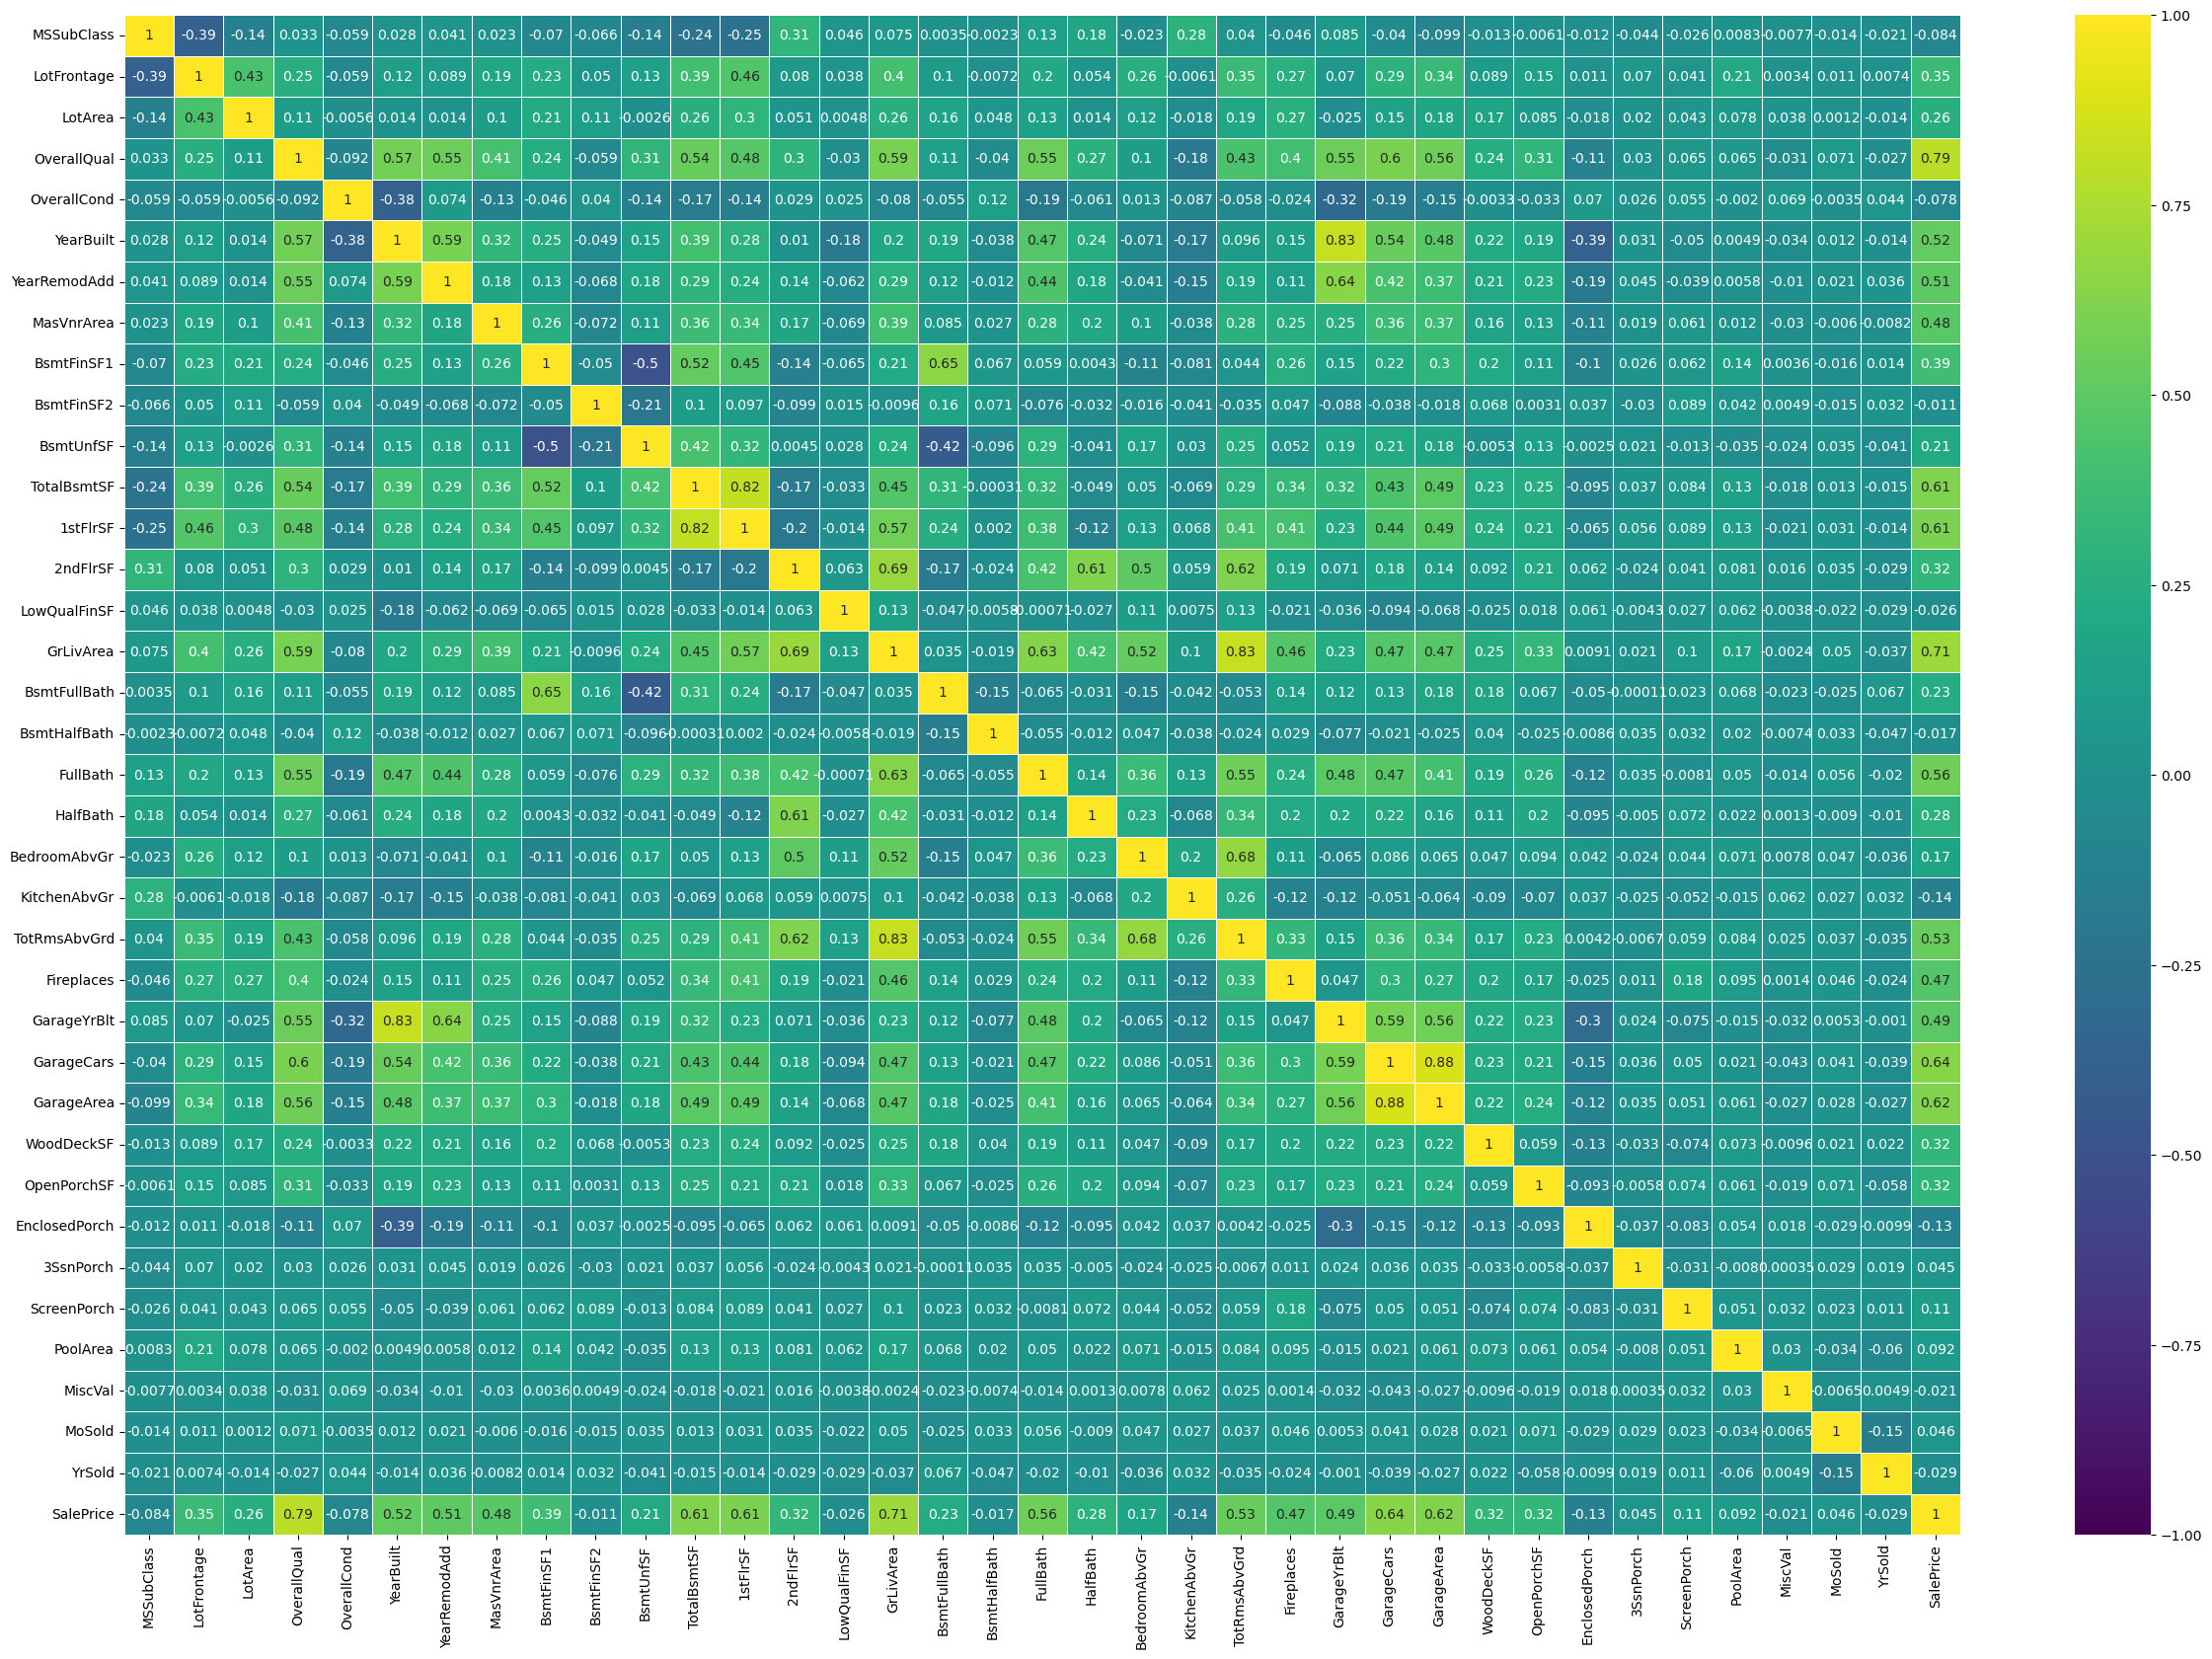

In [6]:
plt.figure(figsize = (30, 20))

corr_matrix = df.corr(numeric_only = True)

sns.heatmap(
    corr_matrix,
    vmin = -1,
    vmax = 1,
    linewidth = 0.5, 
    cmap = "viridis",
    annot = True
)

plt.plot();

(0,)